In [1]:
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='white', context='talk')

pca = 'imagenet'
regression = 'lin'
models = 'vvs'

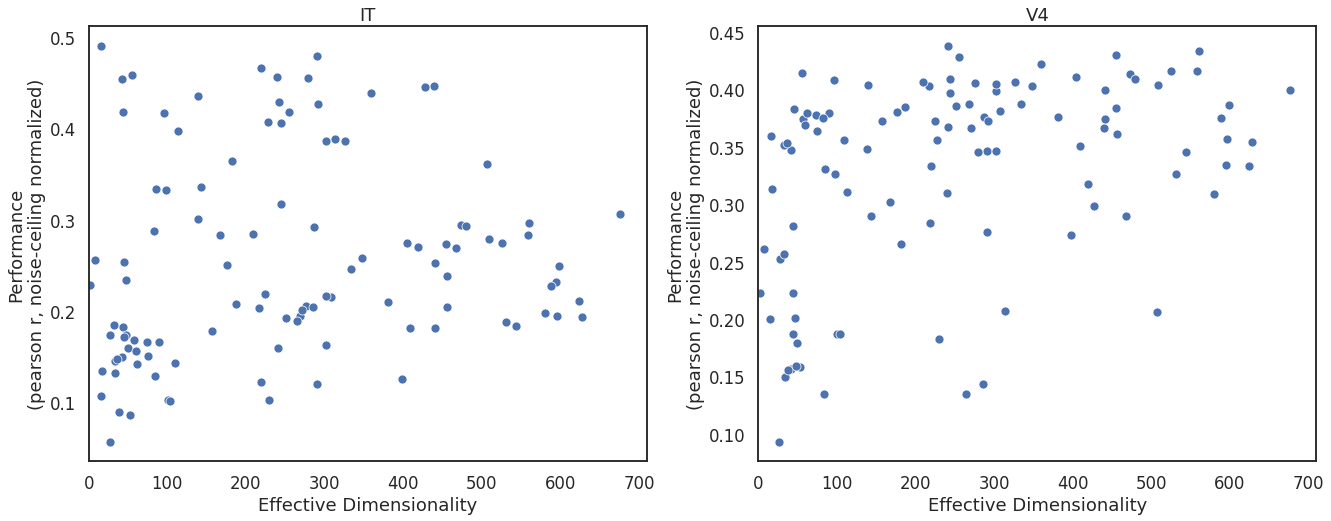

,Region,Effec. Dim. Set,Correlation,p-value
0,IT,ImageNet,0.269586,4.585549e-03
1,IT,Regressors,0.575331,6.007376e-11
2,V4,ImageNet,0.415068,7.201450e-06
3,V4,Regressors,0.344000,2.497746e-04


In [2]:
results = pd.read_csv(f'../results/majajhong2015_{models}_{regression}.csv')

fig, axs = plt.subplots(1, 2, figsize=(22, 8))

sns.scatterplot(x=f'effective_dimensionality_{pca}', y='score',
                data=results[results.region == 'IT'], ax=axs[0])
sns.scatterplot(x=f'effective_dimensionality_{pca}', y='score',
                data=results[results.region == 'V4'], ax=axs[1])

axs[0].set(xlabel='Effective Dimensionality', ylabel='Performance\n(pearson r, noise-ceiling normalized)', title='IT',
          xlim=(0, None))
axs[1].set(xlabel='Effective Dimensionality', ylabel='Performance\n(pearson r, noise-ceiling normalized)', title='V4',
          xlim=(0, None))

plt.show()

it = results[results.region == 'IT']
it_imagenet_r, it_imagenet_p = stats.spearmanr(it.effective_dimensionality_imagenet, it.score)
it_dataset_r, it_dataset_p = stats.spearmanr(it.effective_dimensionality_dataset, it.score)

v4 = results[results.region == 'V4']
v4_imagenet_r, v4_imagenet_p = stats.spearmanr(v4.effective_dimensionality_imagenet, v4.score)
v4_dataset_r, v4_dataset_p = stats.spearmanr(v4.effective_dimensionality_dataset, v4.score)

correlations = pd.DataFrame({'Region': ['IT', 'IT', 'V4', 'V4'], 
                             'Effec. Dim. Set': ['ImageNet', 'Regressors', 'ImageNet', 'Regressors'], 
                             'Correlation': [it_imagenet_r, it_dataset_r, v4_imagenet_r, v4_dataset_r], 
                             'p-value': [it_imagenet_p, it_dataset_p, v4_imagenet_p, v4_dataset_p]})

correlations

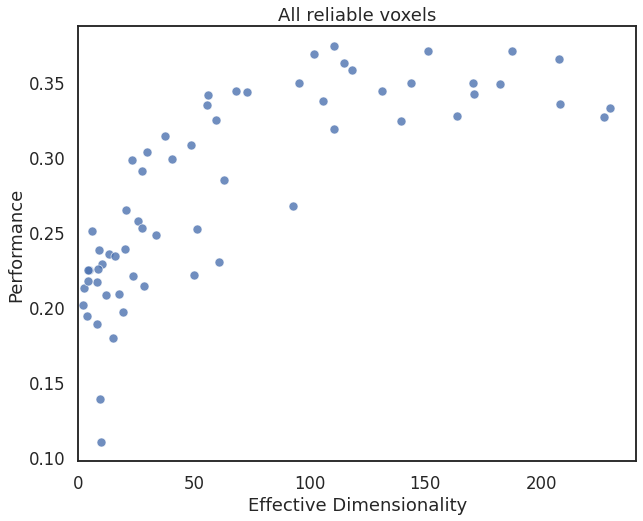

,Region,Effec. Dim. Set,Correlation,p-value
0,All reliable voxels,ImageNet,0.849702,1.316006e-18
1,All reliable voxels,Regressors,0.809764,9.364730e-16


In [37]:
results = pd.read_csv(f'../results/object2vec_{models}_{regression}.csv')
regions = 'All reliable voxels'

fig, ax = plt.subplots(figsize=(10, 8))

sns.scatterplot(x=f'effective_dimensionality_{pca}', y='score',
                data=results, ax=ax, 
                alpha=0.8)

ax.set(xlabel='Effective Dimensionality', ylabel='Performance', title=regions,
       xlim=(0, None))

plt.show()

imagenet_r, imagenet_p = stats.spearmanr(results.effective_dimensionality_imagenet, results.score)
dataset_r, dataset_p = stats.spearmanr(results.effective_dimensionality_dataset, results.score)

correlations = pd.DataFrame({'Region': [regions, regions], 
                             'Effec. Dim. Set': ['ImageNet', 'Regressors'], 
                             'Correlation': [imagenet_r, dataset_r], 
                             'p-value': [imagenet_p, dataset_p]})

correlations